 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [134]:
# Initial imports
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [135]:
whale_returns_csv = Path(r"C:\Users\ethan\Documents\Module-4-Challenge\resources\Resources\whale_returns.csv")

In [136]:
# Reading whale returns
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [137]:
# Count nulls
whale_returns_null = whale_returns_df.isnull().sum()
whale_returns_null

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [138]:
# Drop nulls
whale_returns_df.dropna(inplace = True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [139]:
# Reading algorithmic returns
algo_returns_csv = Path(r"C:\Users\ethan\Documents\Module-4-Challenge\resources\Resources\algo_returns.csv")

algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [140]:
# Count nulls
algo_returns_null = algo_returns_df.isnull().sum()
algo_returns_null

Algo 1    0
Algo 2    6
dtype: int64

In [141]:
# Drop nulls
algo_returns_df.dropna(inplace = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [142]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path(r"C:\Users\ethan\Documents\Module-4-Challenge\resources\Resources\sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [143]:
# Check Data Types
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [144]:
# Fix Data Types
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\ethan\AppData\Local\Temp\ipykernel_2196\782877333.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)


In [145]:
# Calculate Daily Returns
tsx_daily_returns = sp_tsx_history_df.pct_change()

In [146]:
# Drop nulls
tsx_daily_returns.dropna(inplace = True)

In [147]:
# Rename `Close` Column to be specific to this portfolio.
tsx_daily_returns = tsx_daily_returns.rename(columns={'Close' : "S&P TSX"})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [148]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
portfolios = pd.concat([whale_returns_df, algo_returns_df, tsx_daily_returns], axis="columns", join="inner")

portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

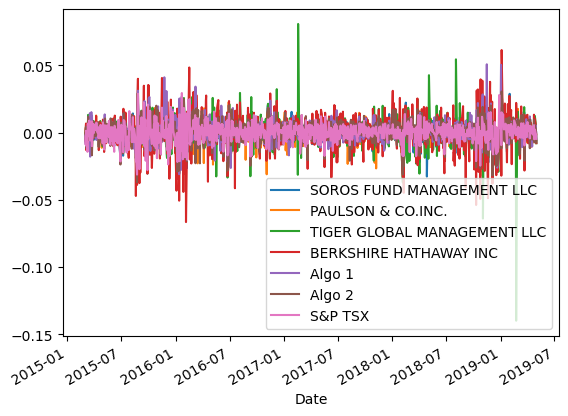

In [149]:
# Plot daily returns of all portfolios
portfolios.plot()

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumluative Returns'}, xlabel='Date'>

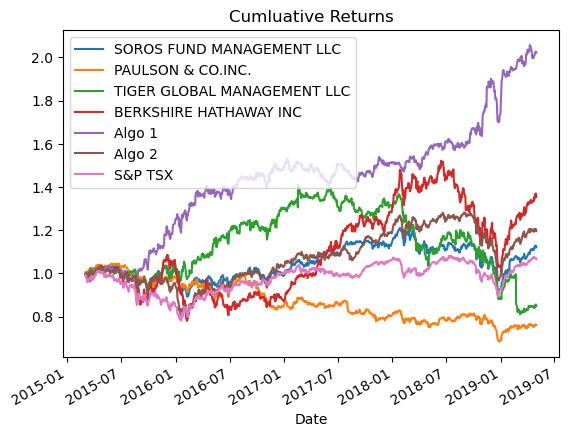

In [203]:
# Calculate cumulative returns of all portfolios
portfolios_cr = (1 + portfolios).cumprod()
# Plot cumulative returns
portfolios_cr.plot(title= "Cumluative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [205]:
# Box plot to visually show risk
portfolios.boxplot(figsize=(20,7), title)

SyntaxError: positional argument follows keyword argument (3586830818.py, line 2)

### Calculate Standard Deviations

In [152]:
# Calculate the daily standard deviations of all portfolios
portfolio_daily_std = portfolios.std().sort_values(ascending = False)
portfolio_daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [153]:
# Calculate  the daily standard deviation of S&P TSX 60
tsx_std_dev = portfolio_daily_std['S&P TSX']
print(f"The daily standard deviation of S&P TSX 60 is {tsx_std_dev}")
# Determine which portfolios are riskier than the S&P TSX 60
riskier_than_tsx = portfolio_daily_std[port_daily_std > tsx_std_dev]
print(f"The following portfolios are risker than the S&P TSX 60:{riskier_than_tsx}")


The daily standard deviation of S&P TSX 60 is 0.007034167748577725
The following portfolios are risker than the S&P TSX 60:BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
dtype: float64


### Calculate the Annualized Standard Deviation

In [154]:
# Calculate the annualized standard deviation (252 trading days)
portfolio_annual_std = portfolio_daily_std * np.sqrt(252)
portfolio_annual_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

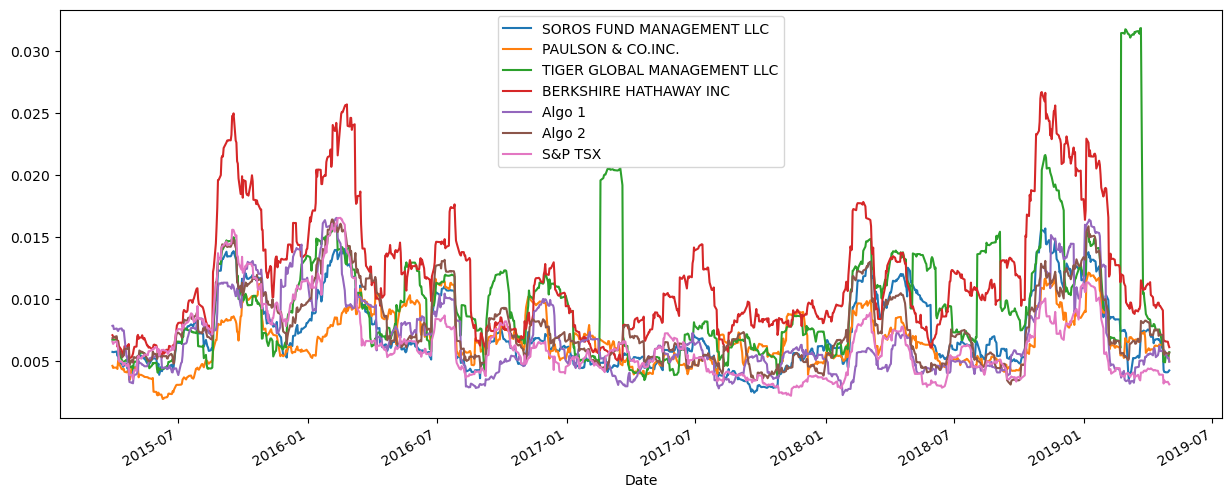

In [167]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_rolling_std = portfolios.rolling(window=21).std()
# Plot the rolling standard deviation
portfolio_rolling_std.plot(figsize=(15,6))

### Calculate and plot the correlation

<Axes: >

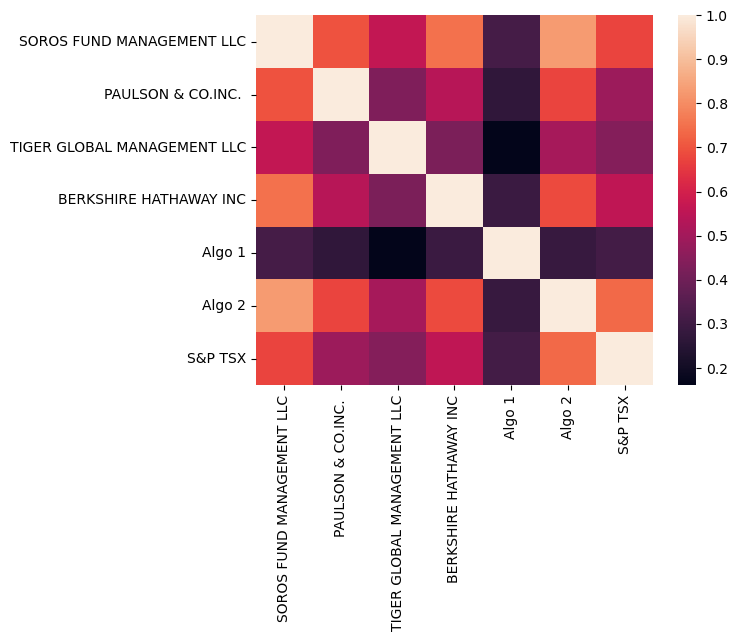

In [156]:
# Calculate the correlation
correlation = portfolios.corr()
# Display de correlation matrix
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

0.3347445908185686


<Axes: xlabel='Date'>

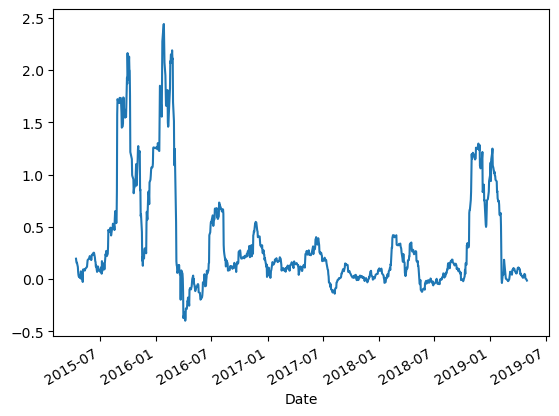

In [177]:
# Calculate covariance of a single portfolio
covariance = portfolios['Algo 1'].cov(portfolios['S&P TSX'])

# Calculate variance of S&P TSX
tsx_variance = portfolios['S&P TSX'].var()
# Computing beta
algo_1_beta = covariance / tsx_variance
print(algo_1_beta)
# Plot beta trend
Beta_trend = (portfolios['Algo 1'].rolling(window=30).cov(portfolios['S&P TSX']) / tsx_variance).rolling(window=30)
rolling_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [183]:
# Use `ewm` to calculate the rolling window
ewma_std = portfolios.ewm(halflife=21).std().dropna()
ewma_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
2015-03-10,0.005816,0.004707,0.006864,0.007841,0.002947,0.007315,0.005485


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [197]:
# Annualized Sharpe Ratios
risk_free_csv = Path(r"C:\Users\ethan\Documents\Module-4-Challenge\resources\Resources\risk_free_rate.csv")
risk_free_df = pd.read_csv(risk_free_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
rf_portfolios = pd.concat([portfolios, risk_free_df], axis="columns", join="inner")

sharpe_ratios = ((rf_portfolios.mean() - rf_portfolios['rf_rate'].mean()) * 252) / (rf_portfolios.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.115847
PAULSON & CO.INC.             -0.756068
TIGER GLOBAL MANAGEMENT LLC   -0.284988
BERKSHIRE HATHAWAY INC         0.365945
Algo 1                         1.261160
Algo 2                         0.204389
S&P TSX                        0.010658
rf_rate                        0.000000
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

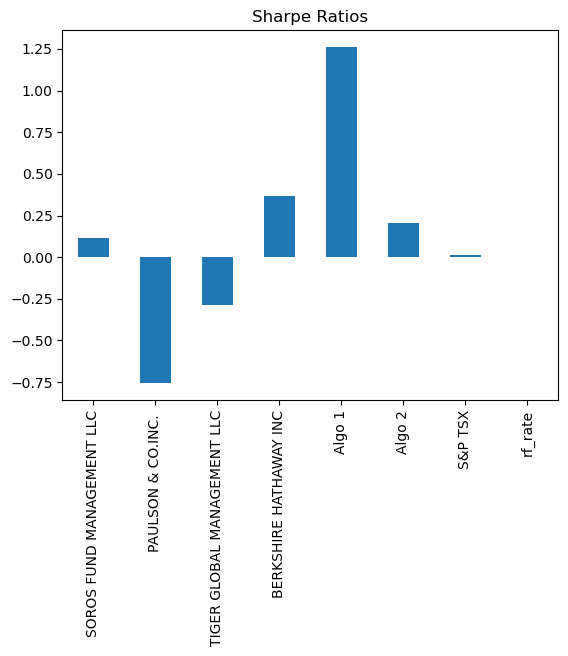

In [199]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title="Sharpe Ratios")

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!